In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import bokeh
from bokeh.plotting import figure, output_file, show, ColumnDataSource
# import bokeh.charts.utils
import bokeh.io
import bokeh.models
from bokeh.models import HoverTool
import bokeh.palettes
import bokeh.plotting
import random
from random import sample
from sklearn import svm, neighbors
from sklearn.model_selection import ShuffleSplit
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.neighbors import KNeighborsRegressor


import multiprocessing as mp

/home/jchenry/code/DAFinalProject/venv/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/jchenry/code/DAFinalProject/venv/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# Preprocessing, normalization done in excel (Xnew = (X-mean)/std))
# If we want to normalize in Python we can use preprocessing.scale()
Data = pd.read_csv('songs4.csv')
Data = Data.iloc[:, 0:18]
#Data = Data.drop(Data[(Data.time_signature > 5)].index)
Data.head()

,ID,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,zero_ts,one_ts,three_ts,four_ts,five_ts
0,5CQ30WqJwcep0pYcV4AMNc,-1.268543,-0.885605,1.050276,-0.280775,-1.258128,-0.630077,0.678645,-0.649848,-0.480625,-1.032112,-1.205528,1.347462,-0.040332,-0.105962,-0.314267,0.378598,-0.152588
1,0yE62JSC9J9C4Q4OBMwBgA,-0.385007,-0.303138,1.050276,0.009403,0.794818,2.212337,-0.630163,-0.658555,-0.504163,-0.175880,-0.772431,-0.113739,-0.040332,-0.105962,3.181954,-2.641279,-0.152588
2,66v8ihTuXUDKqienUaFzIe,-1.191040,-0.723399,-0.901086,-0.765659,0.794818,0.067502,-0.499560,-0.658546,-0.357049,-0.255795,1.629569,-0.519527,-0.040332,-0.105962,-0.314267,0.378598,-0.152588
3,6l4HJkk0CwELcf1CgrbAth,1.511236,0.098691,-1.179852,0.430741,0.794818,-0.338460,-0.052175,-0.658555,0.113717,-0.000828,0.370186,-0.701656,-0.040332,-0.105962,-0.314267,0.378598,-0.152588
4,68rPZWbtaNGUh15AVTSlNn,-0.152498,0.330941,-1.179852,0.428633,0.794818,0.561423,-0.893036,-0.658555,-0.527702,-0.274822,0.025924,0.156217,-0.040332,-0.105962,-0.314267,0.378598,-0.152588


In [3]:
# check number of rows
Data.count()

ID                  60342
danceability        60342
energy              60342
key                 60342
loudness            60342
mode                60342
speechiness         60342
acousticness        60342
instrumentalness    60342
liveness            60342
valence             60342
tempo               60342
duration_ms         60342
zero_ts             60342
one_ts              60342
three_ts            60342
four_ts             60342
five_ts             60342
dtype: int64

In [4]:
# Divide into testing and training
x = Data.drop('valence', 1)
y = Data.valence
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20)
train = xtrain
train['valence'] = ytrain
train = train [0: 5000]
train.head()

/home/jchenry/code/DAFinalProject/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ID,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,zero_ts,one_ts,three_ts,four_ts,five_ts,valence
55070,10RfHbsnlsZuaSFbuMiVTJ,1.351062,0.187167,-0.064788,0.419748,-1.258128,-0.461602,-0.914265,-0.556520,3.214885,0.040786,0.627463,-0.040332,-0.105962,-0.314267,0.378598,-0.152588,-0.156852
7002,7cvKUHKFpYeRoiOM2q7u85,-0.472844,0.146616,1.607808,-0.193887,-1.258128,0.236653,-0.869138,-0.658555,1.643705,0.745961,-1.309352,-0.040332,-0.105962,3.181954,-2.641279,-0.152588,1.060901
58335,2w0wfn8TZhtSl3zqAp6T9o,1.123720,-0.472717,-0.064788,0.535699,-1.258128,1.353050,-0.871083,-0.576927,-0.510048,-1.262086,-0.432949,-0.040332,-0.105962,-0.314267,0.378598,-0.152588,-1.347967
48651,6OooloFox0cGauJW19Pl5V,0.508862,-0.815562,0.213978,-0.530596,0.794818,5.432973,1.098242,-0.658555,4.121108,-0.126170,-0.808466,-0.040332,9.437225,-0.314267,-2.641279,-0.152588,1.235953
17189,2Hv0C1fhK6pdITe2E1oDmA,0.436526,0.297763,0.492744,0.582531,-1.258128,-0.634136,-0.931580,1.787563,-0.251127,0.305997,0.100228,-0.040332,-0.105962,-0.314267,0.378598,-0.152588,0.859210


In [5]:
# Create correlation matrix
M = train.corr()

In [6]:
M

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,zero_ts,one_ts,three_ts,four_ts,five_ts,valence
danceability,1.000000,0.356895,0.034042,0.433005,-0.069170,0.215341,-0.431542,-0.297364,-0.062970,0.049022,-0.136409,-0.101653,-0.097670,-0.228272,0.275395,-0.078606,0.471499
energy,0.356895,1.000000,0.043788,0.822220,-0.053864,0.118805,-0.738758,-0.343289,0.210725,0.243684,-0.100920,-0.054937,-0.085569,-0.251166,0.269545,-0.043374,0.372945
key,0.034042,0.043788,1.000000,0.035208,-0.198514,0.045311,-0.054692,-0.052483,0.016505,0.019520,-0.000445,-0.015696,-0.019683,0.003882,0.005679,-0.001694,0.020355
loudness,0.433005,0.822220,0.035208,1.000000,-0.035706,0.098045,-0.666112,-0.498532,0.147408,0.212134,-0.139692,-0.061679,-0.101755,-0.223695,0.255139,-0.049987,0.355842
mode,-0.069170,-0.053864,-0.198514,-0.035706,1.000000,-0.056951,0.081822,-0.002483,0.022237,0.020514,0.013766,-0.014028,0.011514,0.006665,0.004001,-0.025825,-0.016302
speechiness,0.215341,0.118805,0.045311,0.098045,-0.056951,1.000000,-0.071107,-0.275270,0.188066,-0.033498,0.001557,-0.031580,0.034276,0.018731,-0.076437,0.113789,0.101291
acousticness,-0.431542,-0.738758,-0.054692,-0.666112,0.081822,-0.071107,1.000000,0.320427,-0.079787,-0.206081,0.078157,-0.015303,0.089531,0.280375,-0.290571,0.048785,-0.226103
instrumentalness,-0.297364,-0.343289,-0.052483,-0.498532,-0.002483,-0.275270,0.320427,1.000000,-0.141259,-0.047791,0.180517,-0.023142,0.049452,0.095910,-0.091065,-0.010421,-0.299175
liveness,-0.062970,0.210725,0.016505,0.147408,0.022237,0.188066,-0.079787,-0.141259,1.000000,0.044866,-0.002420,-0.013479,-0.017043,0.004208,-0.005761,0.020029,0.054465
tempo,0.049022,0.243684,0.019520,0.212134,0.020514,-0.033498,-0.206081,-0.047791,0.044866,1.000000,-0.052655,-0.125583,-0.046803,-0.010833,0.051131,-0.026998,0.123785


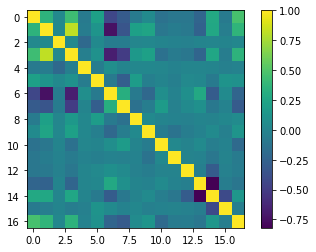

In [7]:
# correlation matrix
plt.imshow(M)
plt.colorbar()
plt.show()

In [8]:
# SVD using numpy function
U, E, VT = np.linalg.svd(M)

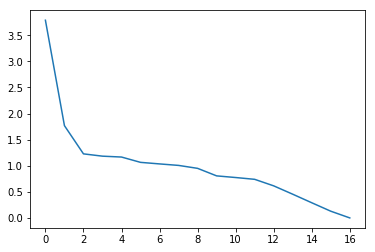

In [9]:
plt.plot(E)
plt.show()

In [10]:
P = np.dot(U[:,:2],np.diag(E[:2]))

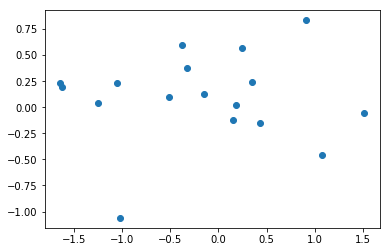

In [11]:
plt.plot(P[:,0], P[:,1],'o')
plt.show()

In [12]:
N = train.T
N.columns = N.iloc[0]
N = N.drop('ID')
N = N.astype(float)

In [13]:
# Takes 10-15 minutes with all of the data
N = N.corr()
N.head()

ID,10RfHbsnlsZuaSFbuMiVTJ,7cvKUHKFpYeRoiOM2q7u85,2w0wfn8TZhtSl3zqAp6T9o,6OooloFox0cGauJW19Pl5V,2Hv0C1fhK6pdITe2E1oDmA,2tCLONcl5ElP9IatoXTmSE,2NVLLGIKvSR25aaLvFLnA7,5dijwrmY2TiYKPepBjM88k,162Ahp4NLv20vjNuERRD69,2hDBBTR8iKdMuauRZ5QbQf,...,3A4Yf6dLvmbmDwlNy8UoqN,4iaMSOWVbEf6BCh5QqO1Aj,7tnSAqCi7rUmMYav3IiofU,5ugyJZYVU1q5Mvtx9puoPH,0m5PQFyWWwclSA0T813jnU,0lR67SQbjZfZR4ekoRhoB0,7Iuw1uGdnHO2fE2Q2qAHY5,7kqSXDiMJJkPRXsmGqN03l,38hdJiiLUSDtI3ax2ibaVR,7quCRxo5d9GaP2D3AvB7gX
ID,,,,,,,,,,,,,,,,,,,,,
10RfHbsnlsZuaSFbuMiVTJ,1.000000,0.191488,0.227785,0.102228,0.161084,0.168028,0.557419,0.304850,0.222822,-0.049195,...,-0.340085,0.870360,-0.036919,-0.011345,0.223175,-0.274742,-0.023989,-0.075310,0.121736,-0.377041
7cvKUHKFpYeRoiOM2q7u85,0.191488,1.000000,-0.130472,0.210559,0.008552,0.098270,0.102550,-0.092805,-0.139389,-0.521709,...,-0.318195,0.248302,-0.379738,-0.312489,0.094000,-0.248466,0.015712,-0.057800,0.108199,0.430173
2w0wfn8TZhtSl3zqAp6T9o,0.227785,-0.130472,1.000000,0.148848,0.036957,0.447402,0.354612,0.106863,0.102732,0.056350,...,-0.205604,0.302807,0.096870,-0.030285,0.026698,-0.064757,-0.016590,0.183657,-0.205075,-0.157124
6OooloFox0cGauJW19Pl5V,0.102228,0.210559,0.148848,1.000000,-0.320243,-0.144234,0.329163,0.173040,0.152537,-0.330963,...,-0.035701,0.082852,-0.348987,-0.118563,-0.128460,0.007193,-0.245831,-0.275950,-0.198153,0.022503
2Hv0C1fhK6pdITe2E1oDmA,0.161084,0.008552,0.036957,-0.320243,1.000000,0.284097,-0.242217,-0.293258,-0.208694,0.263542,...,-0.162553,0.151478,0.097451,-0.119963,0.029770,0.021835,0.092366,0.674376,0.420980,-0.212012


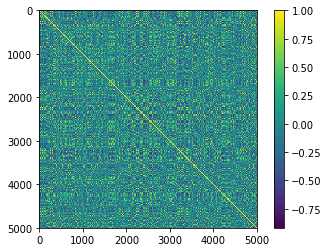

In [14]:
# Identifies how different songs correlate to each other, there is a fair amount of uniqueness among songs
plt.imshow(N)
plt.colorbar()
plt.show()

In [15]:
U, E, VT = np.linalg.svd(N)

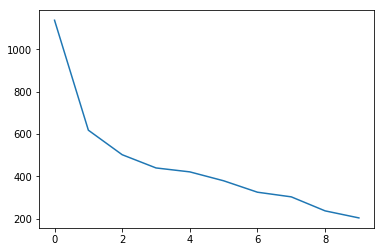

In [16]:
# Most of the variance can be explained using the first 8 or so components
plt.plot(E[:10])
plt.show()

In [17]:
P = np.dot(U[:,:2],np.diag(E[:2]))
print(P)

[[-11.98191706  -4.79911832]
 [  0.31628375  -9.84843641]
 [-10.81897532  -8.59837939]
 ...
 [ -4.59502374  -8.29815121]
 [ -8.73713196 -10.07452311]
 [ 21.55232343  -0.37825663]]


In [18]:
# plot first two principal components to get an idea of the shape of the data
_tools_to_show = 'box_zoom,pan,save,hover,reset,tap,wheel_zoom'        
p = figure(plot_width=400, plot_height=400, title=None, tools=_tools_to_show)

# add a circle renderer with a size, color, and alpha
p.circle(P[:,0], P[:,1], size=4, color="navy", alpha=0.2)

# show the results
show(p)

In [19]:
# SVM on PCA results

In [20]:
# Further divide training and testing based on principal components
# Slice U and E based on the ideal number of principal components
P = np.dot(U,np.diag(E))
P = P[:,:18]
PCA_xtrain, PCA_xtest, PCA_ytrain, PCA_ytest = train_test_split(P, train['valence'], test_size = 0.2, random_state = 0)

In [21]:
SVM_clf = svm.SVR(kernel='linear')

In [22]:
SVM_clf.fit(PCA_xtrain, PCA_ytrain)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [23]:
# testing error
SVM_test_ypreds = SVM_clf.predict(PCA_xtest)
MSE = np.mean((SVM_test_ypreds - PCA_ytest)**2)
MSE

0.06689762096237573

In [24]:
SVM_clf.score(PCA_xtest, PCA_ytest)

0.9311167251427179

In [25]:
SVM_clf.score(PCA_xtrain, PCA_ytrain)

0.930318924611418

In [26]:
# training error
SVM_train_ypreds = SVM_clf.predict(PCA_xtrain)
SVM_test_MSE = np.mean((SVM_train_ypreds - PCA_ytrain)**2)
SVM_test_MSE

0.06854773520067287

In [27]:
# cross validate for values of C and gamma, start by defining the ranges for each
C_range = [0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1.0]

# Cross validate for optimal value of C
def f(i):
    SVM_clf_C = svm.SVR(kernel='sigmoid', C = i)
    SVM_clf_C.fit(PCA_xtrain, PCA_ytrain)
    SVM_test_ypreds_C = SVM_clf_C.predict(PCA_xtest)
    SVM_test_MSE_C = np.mean((SVM_test_ypreds_C - PCA_ytest)**2)
    print(i)
    return SVM_test_MSE_C
    
pool = mp.Pool(processes=8)
C_MSE = pool.map(f, C_range)

0.3
0.1
0.4
0.8
1.0
0.2
0.6


In [ ]:
# Plot values of C vs MSE
_tools_to_show = 'box_zoom,pan,save,hover,reset,tap,wheel_zoom'        
p_C_MSE = figure(plot_width=400, plot_height=400, title=None, tools=_tools_to_show)

# add a circle renderer with a size, color, and alpha
p_C_MSE.circle (C_range, C_MSE, size=10, color="green", alpha=0.5)

# show the results
print(C_MSE)
show(p_C_MSE)

In [ ]:
# Using our optimal value of C, we cross validate to find the optimal value of gamma

def f2(i)
    SVM_clf_gamma = svm.SVR(kernel='rbf', C = 100, gamma = i)
    SVM_clf_gamma.fit(PCA_xtrain, PCA_ytrain)
    SVM_test_ypreds_gamma = SVM_clf_gamma.predict(PCA_xtest)
    SVM_test_MSE_gamma = np.mean((SVM_train_ypreds - PCA_ytest)**2)
    gamma_MSE.append(SVM_test_MSE_gamma)
    
gamma_MSE = pool.map(f2, gamma_range)

In [ ]:
# Plot various values of gamma vs MSE
_tools_to_show = 'box_zoom,pan,save,hover,resize,reset,tap,wheel_zoom'        
p_gamma_MSE = figure(plot_width=400, plot_height=400, title=None, tools=_tools_to_show)

# add a circle renderer with a size, color, and alpha
p_gamma_MSE.circle (gamma_range, gamma_MSE, size=10, color="orange", alpha=0.5)

# show the results
show(p_gamma_MSE)

In [ ]:
# Random Forest

RF_clf = RandomForestRegressor()

# specify parameters and distributions to sample from
parameters_rand = {
    "n_estimators": sp_randint(10, 60),
    "bootstrap": [True, False],
}

# run randomized search
# Accuracy should be comparable to grid search, but runs much much faster
n_iter_search = 20
random_search = RandomizedSearchCV(RF_clf, param_distributions=parameters_rand,
                                   n_iter=n_iter_search,
                                   n_jobs=-1)

random_search.fit(PCA_xtrain, PCA_ytrain)

predicted = random_search.predict(PCA_xtest)

print("PCA with random forest")
random_search.score(PCA_xtest, PCA_ytest)

In [ ]:
# Lasso (on it's own)
from sklearn import linear_model

# Train
lasso_models = {} # Keyed by alpha
xtrain_no_id = xtrain.iloc[:, 1:]
xtest_no_id  = xtest.iloc[:, 1:]

for alpha in [0.01, 0.05, 0.1, 0.2, 0.5, 0.7, 1.0]:
    lasso_model = linear_model.Lasso(alpha=alpha)
    lasso_model.fit(xtrain_no_id, ytrain)
    
    # Training error
    lasso_train_ypreds = lasso_model.predict(xtrain_no_id)
    lasso_train_MSE = np.mean((lasso_train_ypreds - ytrain) ** 2)
    
    # Testing error
    lasso_test_ypreds = lasso_model.predict(xtest_no_id)
    lasso_test_MSE = np.mean((lasso_test_ypreds - ytest)**2)
    
    # Output
    print("alpha: {}".format(alpha))
    print("training error: {}".format(lasso_train_MSE))
    print("testing  error: {}".format(lasso_test_MSE))
    
    # Save
    lasso_models[alpha] = lasso_model

In [ ]:
# KNN

In [ ]:
jig = neighbors.KNeighborsRegressor()

In [ ]:
jig.fit(PCA_xtrain, PCA_ytrain)

In [ ]:
knn_test_ypreds = jig.predict(PCA_xtest)

In [ ]:
knn_test_MSE = np.mean((y_pred2 - y_test)**2)

In [ ]:
knn_test_MSE

In [ ]:
jig.score(PCA_xtest, PCA_ytest)

In [ ]:
n_samples = PCA_xtrain.data.shape[0]

In [ ]:
n_samples

In [ ]:
# cross validation for KNN  
kf = KFold(n_samples, n_folds=5, shuffle=False)
print(kf)

In [ ]:
# we use cross validation to find the optimal number of k
k  = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
knn_test_MSE_k = []
for i in k: 
    knn = KNeighborsRegressor(n_neighbors=i)
    scores = cross_val_score(knn, PCA_xtrain, PCA_ytrain, cv=5, scoring='neg_mean_squared_error')
    MSE_k = abs(sum(scores))/5
    knn_test_MSE_k.append(MSE_k)

In [ ]:
# graph number of k vs mse
_tools_to_show = 'box_zoom,pan,save,hover,resize,reset,tap,wheel_zoom'        
p_knn_MSE = figure(plot_width=400, plot_height=400, title=None, tools=_tools_to_show)

# add a circle renderer with a size, color, and alpha
p_knn_MSE.circle (k, knn_test_MSE, size=10, color="red", alpha=0.5)

# show the results
show(p_knn_MSE)

In [ ]:
PCA_xtrain.shape()